In [54]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import pandas as pd
from scipy.stats import entropy
import math
import keras
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [55]:
data=pd.read_csv(r"C:\Users\rajan\OneDrive\Documents\FullDataset.csv",sep=",")
X=data.iloc[:,0:9]
print(X)
Y=data.iloc[:,9]
print(Y)

           Jump   retOpen  Returns(120mins)  Returns(90mins)  Returns(60mins)  \
0      0.999012 -0.362499         -0.169998        -0.072498        -0.004997   
1      0.999012 -0.375000         -0.167500        -0.064999         0.020000   
2      0.999012 -0.377502         -0.087502        -0.020000        -0.050003   
3      0.999012 -0.397499         -0.087498        -0.002499         0.007504   
4      0.999012 -0.505001         -0.147499        -0.177502        -0.142502   
...         ...       ...               ...              ...              ...   
17203  0.998697 -0.144997          0.017502        -0.004997         0.005005   
17204  0.998697 -0.152496         -0.019997        -0.007500         0.012505   
17205  0.998697 -0.189995         -0.049995        -0.039993        -0.029999   
17206  0.998697 -0.184998         -0.040001        -0.019997        -0.019997   
17207  0.998697 -0.172501         -0.022499        -0.012505        -0.027504   

       Returns(30mins)  Ret

data=pd.read_csv(r"C:\Users\rajan\OneDrive\Documents\Returns.csv",sep=",")
X=data.iloc[:,0]
print(X.quantile(0.3))
print(X.quantile(0.7))

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
print(X[0])

[0.47787905 0.26957539 0.41093545 0.47212749 0.57388601 0.42523392
 0.4394395  0.68147733 1.        ]


In [57]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y),Y)
print(class_weights)

[1.54193548 1.30215664 0.43241613 1.60597294 1.54262662]


onehot_encoder = OneHotEncoder(sparse=False)
Y=Y.to_numpy()
Y = Y.reshape(len(Y), 1)
Y = onehot_encoder.fit_transform(Y)
print(Y)

print(len(Y))
print((len(Y[Y==0])/len(Y))*100)
print((len(Y[Y==1])/len(Y))*100)
print((len(Y[Y==2])/len(Y))*100)

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

onehot_encoder = OneHotEncoder(sparse=False)
Y_train=Y_train.to_numpy()
Y_train = Y_train.reshape(len(Y_train), 1)
Y_train = onehot_encoder.fit_transform(Y_train)
old=Y_test
Y_test =Y_test.to_numpy()
Y_test = Y_test.reshape(len(Y_test), 1)
Y_test = onehot_encoder.transform(Y_test)

# c_weight = {0: 1.75, 1: 1, 2: 2}

opt=optimizers.Adam(lr=0.001);
# 0.001
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(units=256, activation='relu',input_dim=X_train.shape[1]))
# model1.add(keras.layers.Dense(units=256, activation='relu'))
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Dense(units=128, activation='relu'))
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Dense(units=64, activation='relu'))
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Dense(units=32, activation='relu'))
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Dense(units=16, activation='relu'))
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Dense(units=8, activation='relu'))
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Dense(units=5, activation='softmax'))
model1.summary()
model1.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'],)
history=model1.fit(X_train, Y_train,
  batch_size=128,
  epochs=3000,
  verbose=1,
  class_weight=class_weights,
  validation_data=(X_test, Y_test),
#   callbacks = [EarlyStopping(monitor='val_loss', patience=5)],
  shuffle=True)

C:\Users\rajan\AppData\Local\conda\conda\envs\PythonGPU\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 256)               2560      
_________________________________________________________________
dropout_61 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_62 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_63 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 32)                2080      
__________

13766/13766 [==============================] - 1s 41us/step - loss: 1.3244 - acc: 0.4707 - val_loss: 1.3096 - val_acc: 0.4704
Epoch 45/3000
13766/13766 [==============================] - 1s 40us/step - loss: 1.3224 - acc: 0.4698 - val_loss: 1.3111 - val_acc: 0.4707
Epoch 46/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.3239 - acc: 0.4693 - val_loss: 1.3097 - val_acc: 0.4686
Epoch 47/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.3214 - acc: 0.4701 - val_loss: 1.3102 - val_acc: 0.4686
Epoch 48/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.3243 - acc: 0.4697 - val_loss: 1.3096 - val_acc: 0.4686
Epoch 49/3000
13766/13766 [==============================] - 1s 50us/step - loss: 1.3220 - acc: 0.4706 - val_loss: 1.3126 - val_acc: 0.4675
Epoch 50/3000
13766/13766 [==============================] - 1s 58us/step - loss: 1.3220 - acc: 0.4723 - val_loss: 1.3039 - val_acc: 0.4709
Epoch 51/3000
13766/13766 [=======

13766/13766 [==============================] - 1s 44us/step - loss: 1.2857 - acc: 0.4794 - val_loss: 1.2833 - val_acc: 0.4747
Epoch 103/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.2876 - acc: 0.4779 - val_loss: 1.2727 - val_acc: 0.4855
Epoch 104/3000
13766/13766 [==============================] - 1s 40us/step - loss: 1.2853 - acc: 0.4821 - val_loss: 1.2801 - val_acc: 0.4808
Epoch 105/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.2846 - acc: 0.4855 - val_loss: 1.2710 - val_acc: 0.4904
Epoch 106/3000
13766/13766 [==============================] - 1s 49us/step - loss: 1.2850 - acc: 0.4824 - val_loss: 1.2811 - val_acc: 0.4872
Epoch 107/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.2809 - acc: 0.4831 - val_loss: 1.2683 - val_acc: 0.4959
Epoch 108/3000
13766/13766 [==============================] - 1s 46us/step - loss: 1.2817 - acc: 0.4867 - val_loss: 1.2717 - val_acc: 0.4910
Epoch 109/3000
13766/13766 [

13766/13766 [==============================] - 1s 44us/step - loss: 1.2370 - acc: 0.5073 - val_loss: 1.2296 - val_acc: 0.5142
Epoch 161/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.2348 - acc: 0.5078 - val_loss: 1.2289 - val_acc: 0.5110
Epoch 162/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.2397 - acc: 0.5008 - val_loss: 1.2495 - val_acc: 0.5035
Epoch 163/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.2319 - acc: 0.5070 - val_loss: 1.2178 - val_acc: 0.5186
Epoch 164/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.2329 - acc: 0.5058 - val_loss: 1.2250 - val_acc: 0.5206
Epoch 165/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.2391 - acc: 0.5057 - val_loss: 1.2328 - val_acc: 0.5116
Epoch 166/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.2327 - acc: 0.5073 - val_loss: 1.2251 - val_acc: 0.5137
Epoch 167/3000
13766/13766 [

13766/13766 [==============================] - 1s 53us/step - loss: 1.1975 - acc: 0.5160 - val_loss: 1.1830 - val_acc: 0.5270
Epoch 219/3000
13766/13766 [==============================] - 1s 49us/step - loss: 1.1945 - acc: 0.5227 - val_loss: 1.1948 - val_acc: 0.5267
Epoch 220/3000
13766/13766 [==============================] - 1s 50us/step - loss: 1.1929 - acc: 0.5175 - val_loss: 1.2029 - val_acc: 0.5192
Epoch 221/3000
13766/13766 [==============================] - 1s 48us/step - loss: 1.2024 - acc: 0.5165 - val_loss: 1.1835 - val_acc: 0.5293
Epoch 222/3000
13766/13766 [==============================] - 1s 51us/step - loss: 1.1995 - acc: 0.5183 - val_loss: 1.1929 - val_acc: 0.5267
Epoch 223/3000
13766/13766 [==============================] - 1s 52us/step - loss: 1.1964 - acc: 0.5182 - val_loss: 1.1937 - val_acc: 0.5250
Epoch 224/3000
13766/13766 [==============================] - 1s 53us/step - loss: 1.1982 - acc: 0.5180 - val_loss: 1.1854 - val_acc: 0.5279
Epoch 225/3000
13766/13766 [

13766/13766 [==============================] - 1s 42us/step - loss: 1.1797 - acc: 0.5277 - val_loss: 1.1702 - val_acc: 0.5418
Epoch 277/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1696 - acc: 0.5303 - val_loss: 1.1688 - val_acc: 0.5372
Epoch 278/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1718 - acc: 0.5278 - val_loss: 1.1613 - val_acc: 0.5439
Epoch 279/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1700 - acc: 0.5259 - val_loss: 1.1609 - val_acc: 0.5383
Epoch 280/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1715 - acc: 0.5285 - val_loss: 1.1526 - val_acc: 0.5383
Epoch 281/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.1767 - acc: 0.5262 - val_loss: 1.1671 - val_acc: 0.5296
Epoch 282/3000
13766/13766 [==============================] - 1s 48us/step - loss: 1.1740 - acc: 0.5317 - val_loss: 1.1726 - val_acc: 0.5346
Epoch 283/3000
13766/13766 [

13766/13766 [==============================] - 1s 41us/step - loss: 1.1470 - acc: 0.5381 - val_loss: 1.1599 - val_acc: 0.5410
Epoch 335/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1527 - acc: 0.5369 - val_loss: 1.1407 - val_acc: 0.5459
Epoch 336/3000
13766/13766 [==============================] - 1s 46us/step - loss: 1.1477 - acc: 0.5386 - val_loss: 1.1397 - val_acc: 0.5392
Epoch 337/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.1520 - acc: 0.5361 - val_loss: 1.1412 - val_acc: 0.5433
Epoch 338/3000
13766/13766 [==============================] - 1s 54us/step - loss: 1.1547 - acc: 0.5338 - val_loss: 1.1524 - val_acc: 0.5459
Epoch 339/3000
13766/13766 [==============================] - 1s 46us/step - loss: 1.1555 - acc: 0.5360 - val_loss: 1.1494 - val_acc: 0.5418
Epoch 340/3000
13766/13766 [==============================] - 1s 54us/step - loss: 1.1459 - acc: 0.5404 - val_loss: 1.1434 - val_acc: 0.5450
Epoch 341/3000
13766/13766 [

13766/13766 [==============================] - 1s 44us/step - loss: 1.1382 - acc: 0.5413 - val_loss: 1.1242 - val_acc: 0.5543
Epoch 393/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1283 - acc: 0.5447 - val_loss: 1.1409 - val_acc: 0.5482
Epoch 394/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1358 - acc: 0.5399 - val_loss: 1.1363 - val_acc: 0.5506
Epoch 395/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1411 - acc: 0.5402 - val_loss: 1.1327 - val_acc: 0.5535
Epoch 396/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1337 - acc: 0.5408 - val_loss: 1.1411 - val_acc: 0.5503
Epoch 397/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1298 - acc: 0.5439 - val_loss: 1.1365 - val_acc: 0.5546
Epoch 398/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1332 - acc: 0.5436 - val_loss: 1.1469 - val_acc: 0.5474
Epoch 399/3000
13766/13766 [

Epoch 450/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1286 - acc: 0.5426 - val_loss: 1.1171 - val_acc: 0.5552
Epoch 451/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1251 - acc: 0.5412 - val_loss: 1.1164 - val_acc: 0.5578
Epoch 452/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.1188 - acc: 0.5475 - val_loss: 1.1217 - val_acc: 0.5523
Epoch 453/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.1187 - acc: 0.5469 - val_loss: 1.1098 - val_acc: 0.5590
Epoch 454/3000
13766/13766 [==============================] - 1s 50us/step - loss: 1.1197 - acc: 0.5445 - val_loss: 1.1336 - val_acc: 0.5535
Epoch 455/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.1212 - acc: 0.5451 - val_loss: 1.1314 - val_acc: 0.5500
Epoch 456/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.1210 - acc: 0.5452 - val_loss: 1.1242 - val_acc: 0.5572
Epoch 457/300

13766/13766 [==============================] - 1s 51us/step - loss: 1.1068 - acc: 0.5545 - val_loss: 1.1137 - val_acc: 0.5561
Epoch 509/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.1103 - acc: 0.5490 - val_loss: 1.1148 - val_acc: 0.5558
Epoch 510/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.1041 - acc: 0.5495 - val_loss: 1.1130 - val_acc: 0.5517
Epoch 511/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.1048 - acc: 0.5497 - val_loss: 1.1124 - val_acc: 0.5581
Epoch 512/3000
13766/13766 [==============================] - 1s 50us/step - loss: 1.1094 - acc: 0.5477 - val_loss: 1.1072 - val_acc: 0.5581
Epoch 513/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.1063 - acc: 0.5506 - val_loss: 1.1119 - val_acc: 0.5546
Epoch 514/3000
13766/13766 [==============================] - 1s 48us/step - loss: 1.1119 - acc: 0.5519 - val_loss: 1.1208 - val_acc: 0.5552
Epoch 515/3000
13766/13766 [

Epoch 566/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1046 - acc: 0.5555 - val_loss: 1.1180 - val_acc: 0.5543
Epoch 567/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1080 - acc: 0.5530 - val_loss: 1.1256 - val_acc: 0.5572
Epoch 568/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1038 - acc: 0.5540 - val_loss: 1.1019 - val_acc: 0.5529
Epoch 569/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0994 - acc: 0.5508 - val_loss: 1.1097 - val_acc: 0.5581
Epoch 570/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0985 - acc: 0.5546 - val_loss: 1.1106 - val_acc: 0.5578
Epoch 571/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.1015 - acc: 0.5524 - val_loss: 1.1174 - val_acc: 0.5622
Epoch 572/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0948 - acc: 0.5540 - val_loss: 1.1080 - val_acc: 0.5596
Epoch 573/300

13766/13766 [==============================] - 1s 42us/step - loss: 1.0887 - acc: 0.5564 - val_loss: 1.1136 - val_acc: 0.5633
Epoch 625/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0958 - acc: 0.5532 - val_loss: 1.1124 - val_acc: 0.5596
Epoch 626/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0932 - acc: 0.5580 - val_loss: 1.1146 - val_acc: 0.5575
Epoch 627/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0868 - acc: 0.5577 - val_loss: 1.1068 - val_acc: 0.5628
Epoch 628/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0898 - acc: 0.5611 - val_loss: 1.1094 - val_acc: 0.5598
Epoch 629/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0923 - acc: 0.5522 - val_loss: 1.1255 - val_acc: 0.5567
Epoch 630/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0938 - acc: 0.5556 - val_loss: 1.1044 - val_acc: 0.5616
Epoch 631/3000
13766/13766 [

13766/13766 [==============================] - 1s 41us/step - loss: 1.0685 - acc: 0.5681 - val_loss: 1.1015 - val_acc: 0.5689
Epoch 683/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0830 - acc: 0.5625 - val_loss: 1.1057 - val_acc: 0.5668
Epoch 684/3000
13766/13766 [==============================] - 1s 40us/step - loss: 1.0846 - acc: 0.5627 - val_loss: 1.1129 - val_acc: 0.5642
Epoch 685/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0819 - acc: 0.5617 - val_loss: 1.0958 - val_acc: 0.5662
Epoch 686/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0817 - acc: 0.5634 - val_loss: 1.0985 - val_acc: 0.5686
Epoch 687/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0771 - acc: 0.5631 - val_loss: 1.1031 - val_acc: 0.5691
Epoch 688/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0760 - acc: 0.5632 - val_loss: 1.1074 - val_acc: 0.5596
Epoch 689/3000
13766/13766 [

Epoch 740/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0734 - acc: 0.5670 - val_loss: 1.0917 - val_acc: 0.5662
Epoch 741/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0658 - acc: 0.5667 - val_loss: 1.1014 - val_acc: 0.5639
Epoch 742/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0722 - acc: 0.5619 - val_loss: 1.1026 - val_acc: 0.5706
Epoch 743/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0758 - acc: 0.5650 - val_loss: 1.1059 - val_acc: 0.5601
Epoch 744/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0701 - acc: 0.5694 - val_loss: 1.1029 - val_acc: 0.5694
Epoch 745/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0701 - acc: 0.5696 - val_loss: 1.1017 - val_acc: 0.5691
Epoch 746/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0671 - acc: 0.5685 - val_loss: 1.0962 - val_acc: 0.5677
Epoch 747/300

13766/13766 [==============================] - 1s 41us/step - loss: 1.0731 - acc: 0.5696 - val_loss: 1.1056 - val_acc: 0.5619
Epoch 799/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0736 - acc: 0.5660 - val_loss: 1.0935 - val_acc: 0.5680
Epoch 800/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0703 - acc: 0.5660 - val_loss: 1.0996 - val_acc: 0.5651
Epoch 801/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0653 - acc: 0.5692 - val_loss: 1.1086 - val_acc: 0.5686
Epoch 802/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0683 - acc: 0.5672 - val_loss: 1.1199 - val_acc: 0.5607
Epoch 803/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0574 - acc: 0.5692 - val_loss: 1.0972 - val_acc: 0.5700
Epoch 804/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0705 - acc: 0.5729 - val_loss: 1.0941 - val_acc: 0.5718
Epoch 805/3000
13766/13766 [

13766/13766 [==============================] - 1s 41us/step - loss: 1.0656 - acc: 0.5745 - val_loss: 1.0697 - val_acc: 0.5779
Epoch 857/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0667 - acc: 0.5694 - val_loss: 1.0936 - val_acc: 0.5735
Epoch 858/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0652 - acc: 0.5724 - val_loss: 1.0793 - val_acc: 0.5741
Epoch 859/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0648 - acc: 0.5709 - val_loss: 1.1019 - val_acc: 0.5668
Epoch 860/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0651 - acc: 0.5678 - val_loss: 1.0992 - val_acc: 0.5691
Epoch 861/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0682 - acc: 0.5705 - val_loss: 1.0927 - val_acc: 0.5686
Epoch 862/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0639 - acc: 0.5710 - val_loss: 1.0814 - val_acc: 0.5729
Epoch 863/3000
13766/13766 [

13766/13766 [==============================] - 1s 41us/step - loss: 1.0544 - acc: 0.5734 - val_loss: 1.1056 - val_acc: 0.5741
Epoch 915/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0529 - acc: 0.5765 - val_loss: 1.0912 - val_acc: 0.5779
Epoch 916/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0571 - acc: 0.5702 - val_loss: 1.1018 - val_acc: 0.5738
Epoch 917/3000
13766/13766 [==============================] - 1s 57us/step - loss: 1.0603 - acc: 0.5733 - val_loss: 1.0873 - val_acc: 0.5732
Epoch 918/3000
13766/13766 [==============================] - 1s 58us/step - loss: 1.0707 - acc: 0.5661 - val_loss: 1.0943 - val_acc: 0.5694
Epoch 919/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0546 - acc: 0.5734 - val_loss: 1.0810 - val_acc: 0.5729
Epoch 920/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0480 - acc: 0.5793 - val_loss: 1.0944 - val_acc: 0.5732
Epoch 921/3000
13766/13766 [

13766/13766 [==============================] - 1s 41us/step - loss: 1.0503 - acc: 0.5742 - val_loss: 1.0884 - val_acc: 0.5732
Epoch 973/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0476 - acc: 0.5747 - val_loss: 1.0898 - val_acc: 0.5764
Epoch 974/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0537 - acc: 0.5794 - val_loss: 1.0730 - val_acc: 0.5805
Epoch 975/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0604 - acc: 0.5730 - val_loss: 1.0801 - val_acc: 0.5793
Epoch 976/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0539 - acc: 0.5745 - val_loss: 1.0758 - val_acc: 0.5738
Epoch 977/3000
13766/13766 [==============================] - 1s 49us/step - loss: 1.0371 - acc: 0.5838 - val_loss: 1.0854 - val_acc: 0.5831
Epoch 978/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0474 - acc: 0.5758 - val_loss: 1.0870 - val_acc: 0.5767
Epoch 979/3000
13766/13766 [

Epoch 1030/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0444 - acc: 0.5786 - val_loss: 1.0804 - val_acc: 0.5822
Epoch 1031/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0376 - acc: 0.5780 - val_loss: 1.0736 - val_acc: 0.5750
Epoch 1032/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0393 - acc: 0.5803 - val_loss: 1.0653 - val_acc: 0.5802
Epoch 1033/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0451 - acc: 0.5758 - val_loss: 1.0791 - val_acc: 0.5755
Epoch 1034/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0413 - acc: 0.5798 - val_loss: 1.0843 - val_acc: 0.5747
Epoch 1035/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0446 - acc: 0.5789 - val_loss: 1.0800 - val_acc: 0.5689
Epoch 1036/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0364 - acc: 0.5806 - val_loss: 1.0852 - val_acc: 0.5712
Epoch 

13766/13766 [==============================] - 1s 49us/step - loss: 1.0379 - acc: 0.5813 - val_loss: 1.0820 - val_acc: 0.5770
Epoch 1088/3000
13766/13766 [==============================] - 1s 49us/step - loss: 1.0455 - acc: 0.5776 - val_loss: 1.0741 - val_acc: 0.5782
Epoch 1089/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0423 - acc: 0.5800 - val_loss: 1.0898 - val_acc: 0.5691
Epoch 1090/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0354 - acc: 0.5830 - val_loss: 1.0686 - val_acc: 0.5813
Epoch 1091/3000
13766/13766 [==============================] - 1s 62us/step - loss: 1.0475 - acc: 0.5755 - val_loss: 1.0781 - val_acc: 0.5784
Epoch 1092/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0478 - acc: 0.5755 - val_loss: 1.0783 - val_acc: 0.5787
Epoch 1093/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0497 - acc: 0.5785 - val_loss: 1.0807 - val_acc: 0.5735
Epoch 1094/3000
13766/

13766/13766 [==============================] - 1s 46us/step - loss: 1.0336 - acc: 0.5828 - val_loss: 1.0645 - val_acc: 0.5813
Epoch 1145/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0356 - acc: 0.5845 - val_loss: 1.0829 - val_acc: 0.5793
Epoch 1146/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0332 - acc: 0.5804 - val_loss: 1.0730 - val_acc: 0.5805
Epoch 1147/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0329 - acc: 0.5795 - val_loss: 1.0758 - val_acc: 0.5808
Epoch 1148/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0272 - acc: 0.5819 - val_loss: 1.0802 - val_acc: 0.5752
Epoch 1149/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0358 - acc: 0.5829 - val_loss: 1.0682 - val_acc: 0.5816
Epoch 1150/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0359 - acc: 0.5827 - val_loss: 1.0870 - val_acc: 0.5744
Epoch 1151/3000
13766/

Epoch 1202/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0419 - acc: 0.5817 - val_loss: 1.0762 - val_acc: 0.5831
Epoch 1203/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0334 - acc: 0.5820 - val_loss: 1.0701 - val_acc: 0.5802
Epoch 1204/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0415 - acc: 0.5805 - val_loss: 1.0707 - val_acc: 0.5819
Epoch 1205/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0366 - acc: 0.5794 - val_loss: 1.0630 - val_acc: 0.5872
Epoch 1206/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0358 - acc: 0.5793 - val_loss: 1.0635 - val_acc: 0.5924
Epoch 1207/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0217 - acc: 0.5838 - val_loss: 1.0769 - val_acc: 0.5770
Epoch 1208/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0436 - acc: 0.5795 - val_loss: 1.0730 - val_acc: 0.5811
Epoch 

13766/13766 [==============================] - 1s 55us/step - loss: 1.0276 - acc: 0.5843 - val_loss: 1.0606 - val_acc: 0.5828
Epoch 1260/3000
13766/13766 [==============================] - 1s 55us/step - loss: 1.0287 - acc: 0.5859 - val_loss: 1.0626 - val_acc: 0.5787
Epoch 1261/3000
13766/13766 [==============================] - 1s 49us/step - loss: 1.0341 - acc: 0.5846 - val_loss: 1.0687 - val_acc: 0.5831
Epoch 1262/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0316 - acc: 0.5854 - val_loss: 1.0688 - val_acc: 0.5811
Epoch 1263/3000
13766/13766 [==============================] - 1s 47us/step - loss: 1.0379 - acc: 0.5793 - val_loss: 1.0809 - val_acc: 0.5767
Epoch 1264/3000
13766/13766 [==============================] - 1s 47us/step - loss: 1.0276 - acc: 0.5848 - val_loss: 1.0655 - val_acc: 0.5805
Epoch 1265/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0326 - acc: 0.5844 - val_loss: 1.0592 - val_acc: 0.5819
Epoch 1266/3000
13766/

Epoch 1317/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0322 - acc: 0.5883 - val_loss: 1.0584 - val_acc: 0.5866
Epoch 1318/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0177 - acc: 0.5911 - val_loss: 1.0571 - val_acc: 0.5854
Epoch 1319/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0222 - acc: 0.5927 - val_loss: 1.0638 - val_acc: 0.5863
Epoch 1320/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0236 - acc: 0.5892 - val_loss: 1.0785 - val_acc: 0.5721
Epoch 1321/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0246 - acc: 0.5872 - val_loss: 1.0653 - val_acc: 0.5848
Epoch 1322/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0269 - acc: 0.5884 - val_loss: 1.0636 - val_acc: 0.5787
Epoch 1323/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0273 - acc: 0.5848 - val_loss: 1.0536 - val_acc: 0.5892
Epoch 

13766/13766 [==============================] - 1s 42us/step - loss: 1.0285 - acc: 0.5874 - val_loss: 1.0802 - val_acc: 0.5787
Epoch 1375/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0252 - acc: 0.5889 - val_loss: 1.0616 - val_acc: 0.5921
Epoch 1376/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0196 - acc: 0.5901 - val_loss: 1.0541 - val_acc: 0.5898
Epoch 1377/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0226 - acc: 0.5866 - val_loss: 1.0569 - val_acc: 0.5857
Epoch 1378/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0228 - acc: 0.5843 - val_loss: 1.0642 - val_acc: 0.5854
Epoch 1379/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0214 - acc: 0.5901 - val_loss: 1.0614 - val_acc: 0.5918
Epoch 1380/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0202 - acc: 0.5888 - val_loss: 1.0545 - val_acc: 0.5976
Epoch 1381/3000
13766/

Epoch 1432/3000
13766/13766 [==============================] - 1s 47us/step - loss: 1.0275 - acc: 0.5907 - val_loss: 1.0632 - val_acc: 0.5877
Epoch 1433/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0176 - acc: 0.5891 - val_loss: 1.0514 - val_acc: 0.5845
Epoch 1434/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0162 - acc: 0.5878 - val_loss: 1.0720 - val_acc: 0.5811
Epoch 1435/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0241 - acc: 0.5917 - val_loss: 1.0519 - val_acc: 0.5883
Epoch 1436/3000
13766/13766 [==============================] - 1s 43us/step - loss: 1.0170 - acc: 0.5877 - val_loss: 1.0530 - val_acc: 0.5880
Epoch 1437/3000
13766/13766 [==============================] - 1s 46us/step - loss: 1.0194 - acc: 0.5882 - val_loss: 1.0423 - val_acc: 0.5956
Epoch 1438/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0213 - acc: 0.5888 - val_loss: 1.0551 - val_acc: 0.5904
Epoch 

13766/13766 [==============================] - 1s 41us/step - loss: 1.0119 - acc: 0.5952 - val_loss: 1.0665 - val_acc: 0.5909
Epoch 1490/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0118 - acc: 0.5952 - val_loss: 1.0614 - val_acc: 0.5825
Epoch 1491/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0187 - acc: 0.5927 - val_loss: 1.0653 - val_acc: 0.5904
Epoch 1492/3000
13766/13766 [==============================] - 1s 50us/step - loss: 1.0139 - acc: 0.5907 - val_loss: 1.0540 - val_acc: 0.5860
Epoch 1493/3000
13766/13766 [==============================] - 1s 48us/step - loss: 1.0165 - acc: 0.5901 - val_loss: 1.0581 - val_acc: 0.5851
Epoch 1494/3000
13766/13766 [==============================] - 1s 47us/step - loss: 1.0108 - acc: 0.5912 - val_loss: 1.0556 - val_acc: 0.5863
Epoch 1495/3000
13766/13766 [==============================] - 1s 50us/step - loss: 1.0211 - acc: 0.5885 - val_loss: 1.0674 - val_acc: 0.5863
Epoch 1496/3000
13766/

Epoch 1547/3000
13766/13766 [==============================] - 1s 57us/step - loss: 1.0119 - acc: 0.5923 - val_loss: 1.0599 - val_acc: 0.5790
Epoch 1548/3000
13766/13766 [==============================] - 1s 58us/step - loss: 1.0109 - acc: 0.5908 - val_loss: 1.0534 - val_acc: 0.5889
Epoch 1549/3000
13766/13766 [==============================] - 1s 61us/step - loss: 1.0156 - acc: 0.5896 - val_loss: 1.0572 - val_acc: 0.5860
Epoch 1550/3000
13766/13766 [==============================] - 1s 56us/step - loss: 1.0173 - acc: 0.5932 - val_loss: 1.0623 - val_acc: 0.5802
Epoch 1551/3000
13766/13766 [==============================] - 1s 83us/step - loss: 1.0070 - acc: 0.5942 - val_loss: 1.0457 - val_acc: 0.5889
Epoch 1552/3000
13766/13766 [==============================] - 1s 47us/step - loss: 1.0098 - acc: 0.5955 - val_loss: 1.0558 - val_acc: 0.5889
Epoch 1553/3000
13766/13766 [==============================] - ETA: 0s - loss: 1.0086 - acc: 0.594 - 1s 41us/step - loss: 1.0126 - acc: 0.5925 - val

13766/13766 [==============================] - 1s 54us/step - loss: 1.0185 - acc: 0.5936 - val_loss: 1.0544 - val_acc: 0.5880
Epoch 1605/3000
13766/13766 [==============================] - 1s 54us/step - loss: 1.0071 - acc: 0.5919 - val_loss: 1.0575 - val_acc: 0.5872
Epoch 1606/3000
13766/13766 [==============================] - 1s 57us/step - loss: 1.0081 - acc: 0.5942 - val_loss: 1.0671 - val_acc: 0.5918
Epoch 1607/3000
13766/13766 [==============================] - 1s 55us/step - loss: 1.0052 - acc: 0.5970 - val_loss: 1.0643 - val_acc: 0.5872
Epoch 1608/3000
13766/13766 [==============================] - 1s 55us/step - loss: 1.0161 - acc: 0.5903 - val_loss: 1.0491 - val_acc: 0.5883
Epoch 1609/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0156 - acc: 0.5899 - val_loss: 1.0573 - val_acc: 0.5880
Epoch 1610/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0077 - acc: 0.5976 - val_loss: 1.0563 - val_acc: 0.5822
Epoch 1611/3000
13766/

Epoch 1662/3000
13766/13766 [==============================] - 1s 49us/step - loss: 1.0054 - acc: 0.5963 - val_loss: 1.0524 - val_acc: 0.5857
Epoch 1663/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0047 - acc: 0.5939 - val_loss: 1.0650 - val_acc: 0.5898
Epoch 1664/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0120 - acc: 0.5957 - val_loss: 1.0560 - val_acc: 0.5843
Epoch 1665/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0004 - acc: 0.5947 - val_loss: 1.0475 - val_acc: 0.5967
Epoch 1666/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0014 - acc: 0.5951 - val_loss: 1.0525 - val_acc: 0.5880
Epoch 1667/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0102 - acc: 0.5932 - val_loss: 1.0489 - val_acc: 0.5895
Epoch 1668/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0133 - acc: 0.5928 - val_loss: 1.0519 - val_acc: 0.5845
Epoch 

13766/13766 [==============================] - 1s 50us/step - loss: 1.0090 - acc: 0.5955 - val_loss: 1.0530 - val_acc: 0.5889
Epoch 1720/3000
13766/13766 [==============================] - 1s 48us/step - loss: 0.9979 - acc: 0.6005 - val_loss: 1.0512 - val_acc: 0.5947
Epoch 1721/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9999 - acc: 0.5975 - val_loss: 1.0496 - val_acc: 0.5872
Epoch 1722/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0007 - acc: 0.5960 - val_loss: 1.0452 - val_acc: 0.5976
Epoch 1723/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0031 - acc: 0.5971 - val_loss: 1.0601 - val_acc: 0.5976
Epoch 1724/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0066 - acc: 0.5949 - val_loss: 1.0508 - val_acc: 0.5834
Epoch 1725/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0048 - acc: 0.5949 - val_loss: 1.0744 - val_acc: 0.5816
Epoch 1726/3000
13766/

Epoch 1777/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0037 - acc: 0.5970 - val_loss: 1.0518 - val_acc: 0.5933
Epoch 1778/3000
13766/13766 [==============================] - 1s 54us/step - loss: 1.0034 - acc: 0.5970 - val_loss: 1.0391 - val_acc: 0.5927
Epoch 1779/3000
13766/13766 [==============================] - 1s 55us/step - loss: 1.0108 - acc: 0.5893 - val_loss: 1.0510 - val_acc: 0.5927
Epoch 1780/3000
13766/13766 [==============================] - 1s 46us/step - loss: 0.9948 - acc: 0.5952 - val_loss: 1.0507 - val_acc: 0.5901
Epoch 1781/3000
13766/13766 [==============================] - 1s 45us/step - loss: 1.0087 - acc: 0.5948 - val_loss: 1.0426 - val_acc: 0.5936
Epoch 1782/3000
13766/13766 [==============================] - 1s 44us/step - loss: 1.0082 - acc: 0.5976 - val_loss: 1.0467 - val_acc: 0.5892
Epoch 1783/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9957 - acc: 0.6040 - val_loss: 1.0400 - val_acc: 0.5938
Epoch 

13766/13766 [==============================] - 1s 49us/step - loss: 0.9982 - acc: 0.5944 - val_loss: 1.0348 - val_acc: 0.5953
Epoch 1835/3000
13766/13766 [==============================] - 1s 49us/step - loss: 1.0004 - acc: 0.5972 - val_loss: 1.0379 - val_acc: 0.5976
Epoch 1836/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9939 - acc: 0.6026 - val_loss: 1.0472 - val_acc: 0.5909
Epoch 1837/3000
13766/13766 [==============================] - 1s 48us/step - loss: 0.9937 - acc: 0.6000 - val_loss: 1.0554 - val_acc: 0.5889
Epoch 1838/3000
13766/13766 [==============================] - 1s 48us/step - loss: 0.9934 - acc: 0.5984 - val_loss: 1.0381 - val_acc: 0.6002
Epoch 1839/3000
13766/13766 [==============================] - 1s 57us/step - loss: 1.0091 - acc: 0.5910 - val_loss: 1.0429 - val_acc: 0.5959
Epoch 1840/3000
13766/13766 [==============================] - 1s 58us/step - loss: 0.9997 - acc: 0.5968 - val_loss: 1.0478 - val_acc: 0.5918
Epoch 1841/3000
13766/

Epoch 1892/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9976 - acc: 0.6022 - val_loss: 1.0465 - val_acc: 0.5904
Epoch 1893/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9945 - acc: 0.5997 - val_loss: 1.0360 - val_acc: 0.5912
Epoch 1894/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0097 - acc: 0.5969 - val_loss: 1.0524 - val_acc: 0.5901
Epoch 1895/3000
13766/13766 [==============================] - 1s 42us/step - loss: 1.0008 - acc: 0.5968 - val_loss: 1.0381 - val_acc: 0.5918
Epoch 1896/3000
13766/13766 [==============================] - 1s 41us/step - loss: 1.0029 - acc: 0.5992 - val_loss: 1.0449 - val_acc: 0.5898
Epoch 1897/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9935 - acc: 0.6044 - val_loss: 1.0438 - val_acc: 0.5965
Epoch 1898/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9940 - acc: 0.6031 - val_loss: 1.0425 - val_acc: 0.5822
Epoch 

13766/13766 [==============================] - 1s 43us/step - loss: 0.9872 - acc: 0.6062 - val_loss: 1.0451 - val_acc: 0.5938
Epoch 1950/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9916 - acc: 0.6056 - val_loss: 1.0419 - val_acc: 0.5944
Epoch 1951/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9911 - acc: 0.6006 - val_loss: 1.0366 - val_acc: 0.6034
Epoch 1952/3000
13766/13766 [==============================] - 1s 47us/step - loss: 1.0022 - acc: 0.5961 - val_loss: 1.0447 - val_acc: 0.5933
Epoch 1953/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9981 - acc: 0.6042 - val_loss: 1.0421 - val_acc: 0.5985
Epoch 1954/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9972 - acc: 0.6035 - val_loss: 1.0390 - val_acc: 0.5970
Epoch 1955/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9950 - acc: 0.6013 - val_loss: 1.0406 - val_acc: 0.5936
Epoch 1956/3000
13766/

Epoch 2007/3000
13766/13766 [==============================] - 1s 53us/step - loss: 0.9864 - acc: 0.6086 - val_loss: 1.0388 - val_acc: 0.5962
Epoch 2008/3000
13766/13766 [==============================] - 1s 55us/step - loss: 0.9971 - acc: 0.5999 - val_loss: 1.0450 - val_acc: 0.5909
Epoch 2009/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9862 - acc: 0.6020 - val_loss: 1.0340 - val_acc: 0.5918
Epoch 2010/3000
13766/13766 [==============================] - 1s 53us/step - loss: 0.9864 - acc: 0.6028 - val_loss: 1.0462 - val_acc: 0.5845
Epoch 2011/3000
13766/13766 [==============================] - 1s 59us/step - loss: 0.9950 - acc: 0.6015 - val_loss: 1.0371 - val_acc: 0.5965
Epoch 2012/3000
13766/13766 [==============================] - 1s 60us/step - loss: 1.0008 - acc: 0.5953 - val_loss: 1.0312 - val_acc: 0.5936
Epoch 2013/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9878 - acc: 0.6058 - val_loss: 1.0467 - val_acc: 0.5872
Epoch 

13766/13766 [==============================] - 1s 42us/step - loss: 0.9911 - acc: 0.6020 - val_loss: 1.0371 - val_acc: 0.6002
Epoch 2065/3000
13766/13766 [==============================] - 1s 48us/step - loss: 0.9840 - acc: 0.6057 - val_loss: 1.0512 - val_acc: 0.5924
Epoch 2066/3000
13766/13766 [==============================] - 1s 46us/step - loss: 1.0034 - acc: 0.6002 - val_loss: 1.0469 - val_acc: 0.5892
Epoch 2067/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9959 - acc: 0.5968 - val_loss: 1.0375 - val_acc: 0.5979
Epoch 2068/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9978 - acc: 0.6007 - val_loss: 1.0417 - val_acc: 0.5930
Epoch 2069/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9908 - acc: 0.6030 - val_loss: 1.0262 - val_acc: 0.6002
Epoch 2070/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9931 - acc: 0.6013 - val_loss: 1.0427 - val_acc: 0.5985
Epoch 2071/3000
13766/

Epoch 2122/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9861 - acc: 0.6016 - val_loss: 1.0368 - val_acc: 0.6005
Epoch 2123/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9997 - acc: 0.6030 - val_loss: 1.0437 - val_acc: 0.6002
Epoch 2124/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9864 - acc: 0.6066 - val_loss: 1.0413 - val_acc: 0.5912
Epoch 2125/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9976 - acc: 0.5992 - val_loss: 1.0381 - val_acc: 0.5866
Epoch 2126/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9889 - acc: 0.5984 - val_loss: 1.0575 - val_acc: 0.5845
Epoch 2127/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9832 - acc: 0.6086 - val_loss: 1.0547 - val_acc: 0.5930
Epoch 2128/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9775 - acc: 0.6066 - val_loss: 1.0312 - val_acc: 0.5944
Epoch 

13766/13766 [==============================] - 1s 44us/step - loss: 0.9879 - acc: 0.6042 - val_loss: 1.0499 - val_acc: 0.5915
Epoch 2180/3000
13766/13766 [==============================] - 1s 50us/step - loss: 0.9892 - acc: 0.6013 - val_loss: 1.0341 - val_acc: 0.5915
Epoch 2181/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9816 - acc: 0.6058 - val_loss: 1.0239 - val_acc: 0.5999
Epoch 2182/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9849 - acc: 0.6042 - val_loss: 1.0383 - val_acc: 0.5930
Epoch 2183/3000
13766/13766 [==============================] - 1s 49us/step - loss: 0.9852 - acc: 0.6081 - val_loss: 1.0452 - val_acc: 0.5941
Epoch 2184/3000
13766/13766 [==============================] - 1s 54us/step - loss: 0.9908 - acc: 0.6057 - val_loss: 1.0353 - val_acc: 0.5927
Epoch 2185/3000
13766/13766 [==============================] - 1s 56us/step - loss: 0.9925 - acc: 0.6029 - val_loss: 1.0416 - val_acc: 0.5956
Epoch 2186/3000
13766/

Epoch 2237/3000
13766/13766 [==============================] - 1s 58us/step - loss: 0.9799 - acc: 0.6064 - val_loss: 1.0420 - val_acc: 0.5994
Epoch 2238/3000
13766/13766 [==============================] - 1s 51us/step - loss: 0.9941 - acc: 0.6050 - val_loss: 1.0398 - val_acc: 0.5982
Epoch 2239/3000
13766/13766 [==============================] - 1s 57us/step - loss: 0.9872 - acc: 0.6020 - val_loss: 1.0403 - val_acc: 0.5979
Epoch 2240/3000
13766/13766 [==============================] - 1s 59us/step - loss: 0.9835 - acc: 0.6064 - val_loss: 1.0502 - val_acc: 0.5976
Epoch 2241/3000
13766/13766 [==============================] - 1s 58us/step - loss: 0.9900 - acc: 0.6065 - val_loss: 1.0448 - val_acc: 0.5988
Epoch 2242/3000
13766/13766 [==============================] - 1s 61us/step - loss: 0.9910 - acc: 0.6053 - val_loss: 1.0498 - val_acc: 0.5962
Epoch 2243/3000
13766/13766 [==============================] - 1s 57us/step - loss: 0.9979 - acc: 0.5988 - val_loss: 1.0272 - val_acc: 0.6026
Epoch 

13766/13766 [==============================] - 1s 41us/step - loss: 0.9808 - acc: 0.6079 - val_loss: 1.0316 - val_acc: 0.6011
Epoch 2295/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9889 - acc: 0.6032 - val_loss: 1.0415 - val_acc: 0.5950
Epoch 2296/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9875 - acc: 0.6039 - val_loss: 1.0313 - val_acc: 0.5941
Epoch 2297/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9803 - acc: 0.6082 - val_loss: 1.0366 - val_acc: 0.6008
Epoch 2298/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9770 - acc: 0.6104 - val_loss: 1.0353 - val_acc: 0.5956
Epoch 2299/3000
13766/13766 [==============================] - 1s 49us/step - loss: 0.9810 - acc: 0.6090 - val_loss: 1.0385 - val_acc: 0.5985
Epoch 2300/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9853 - acc: 0.6049 - val_loss: 1.0795 - val_acc: 0.5822
Epoch 2301/3000
13766/

Epoch 2352/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9771 - acc: 0.6054 - val_loss: 1.0575 - val_acc: 0.5909
Epoch 2353/3000
13766/13766 [==============================] - 1s 57us/step - loss: 0.9808 - acc: 0.6063 - val_loss: 1.0371 - val_acc: 0.6017
Epoch 2354/3000
13766/13766 [==============================] - 1s 46us/step - loss: 0.9841 - acc: 0.6074 - val_loss: 1.0461 - val_acc: 0.5988
Epoch 2355/3000
13766/13766 [==============================] - 1s 45us/step - loss: 0.9815 - acc: 0.6057 - val_loss: 1.0549 - val_acc: 0.5953
Epoch 2356/3000
13766/13766 [==============================] - 1s 48us/step - loss: 0.9756 - acc: 0.6081 - val_loss: 1.0448 - val_acc: 0.5944
Epoch 2357/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9763 - acc: 0.6077 - val_loss: 1.0563 - val_acc: 0.5872
Epoch 2358/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9828 - acc: 0.6054 - val_loss: 1.0390 - val_acc: 0.5999
Epoch 

13766/13766 [==============================] - 1s 42us/step - loss: 0.9829 - acc: 0.6090 - val_loss: 1.0393 - val_acc: 0.5979
Epoch 2410/3000
13766/13766 [==============================] - 1s 45us/step - loss: 0.9839 - acc: 0.6040 - val_loss: 1.0238 - val_acc: 0.6043
Epoch 2411/3000
13766/13766 [==============================] - 1s 46us/step - loss: 0.9804 - acc: 0.6097 - val_loss: 1.0340 - val_acc: 0.5970
Epoch 2412/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9835 - acc: 0.6096 - val_loss: 1.0277 - val_acc: 0.6031
Epoch 2413/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9810 - acc: 0.6025 - val_loss: 1.0465 - val_acc: 0.5965
Epoch 2414/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9763 - acc: 0.6138 - val_loss: 1.0291 - val_acc: 0.6046
Epoch 2415/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9826 - acc: 0.6065 - val_loss: 1.0332 - val_acc: 0.6028
Epoch 2416/3000
13766/

Epoch 2467/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9756 - acc: 0.6093 - val_loss: 1.0369 - val_acc: 0.5979
Epoch 2468/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9741 - acc: 0.6077 - val_loss: 1.0429 - val_acc: 0.5941
Epoch 2469/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9698 - acc: 0.6089 - val_loss: 1.0415 - val_acc: 0.5869
Epoch 2470/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9897 - acc: 0.6033 - val_loss: 1.0365 - val_acc: 0.5962
Epoch 2471/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9880 - acc: 0.6087 - val_loss: 1.0431 - val_acc: 0.5988
Epoch 2472/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9784 - acc: 0.6129 - val_loss: 1.0299 - val_acc: 0.5985
Epoch 2473/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9725 - acc: 0.6119 - val_loss: 1.0375 - val_acc: 0.5944
Epoch 

13766/13766 [==============================] - 1s 41us/step - loss: 0.9827 - acc: 0.6111 - val_loss: 1.0292 - val_acc: 0.5999
Epoch 2525/3000
13766/13766 [==============================] - 1s 45us/step - loss: 0.9743 - acc: 0.6059 - val_loss: 1.0463 - val_acc: 0.5947
Epoch 2526/3000
13766/13766 [==============================] - 1s 46us/step - loss: 0.9784 - acc: 0.6069 - val_loss: 1.0472 - val_acc: 0.5962
Epoch 2527/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9827 - acc: 0.6087 - val_loss: 1.0438 - val_acc: 0.5962
Epoch 2528/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9799 - acc: 0.6045 - val_loss: 1.0184 - val_acc: 0.6069
Epoch 2529/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9658 - acc: 0.6137 - val_loss: 1.0202 - val_acc: 0.6060
Epoch 2530/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9816 - acc: 0.6106 - val_loss: 1.0320 - val_acc: 0.6026
Epoch 2531/3000
13766/

Epoch 2582/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9855 - acc: 0.6096 - val_loss: 1.0277 - val_acc: 0.6028
Epoch 2583/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9679 - acc: 0.6140 - val_loss: 1.0376 - val_acc: 0.5924
Epoch 2584/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9819 - acc: 0.6089 - val_loss: 1.0320 - val_acc: 0.6011
Epoch 2585/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9714 - acc: 0.6153 - val_loss: 1.0374 - val_acc: 0.6034
Epoch 2586/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9724 - acc: 0.6106 - val_loss: 1.0269 - val_acc: 0.6058
Epoch 2587/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9853 - acc: 0.6044 - val_loss: 1.0360 - val_acc: 0.5965
Epoch 2588/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9794 - acc: 0.6105 - val_loss: 1.0433 - val_acc: 0.5915
Epoch 

13766/13766 [==============================] - 1s 45us/step - loss: 0.9750 - acc: 0.6115 - val_loss: 1.0332 - val_acc: 0.6084
Epoch 2640/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9678 - acc: 0.6136 - val_loss: 1.0301 - val_acc: 0.6014
Epoch 2641/3000
13766/13766 [==============================] - 1s 40us/step - loss: 0.9689 - acc: 0.6153 - val_loss: 1.0349 - val_acc: 0.6040
Epoch 2642/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9692 - acc: 0.6158 - val_loss: 1.0273 - val_acc: 0.6040
Epoch 2643/3000
13766/13766 [==============================] - 1s 40us/step - loss: 0.9742 - acc: 0.6126 - val_loss: 1.0411 - val_acc: 0.5959
Epoch 2644/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9802 - acc: 0.6044 - val_loss: 1.0294 - val_acc: 0.6046
Epoch 2645/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9752 - acc: 0.6108 - val_loss: 1.0199 - val_acc: 0.5973
Epoch 2646/3000
13766/

13766/13766 [==============================] - 1s 41us/step - loss: 0.9694 - acc: 0.6196 - val_loss: 1.0261 - val_acc: 0.6060
Epoch 2697/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9771 - acc: 0.6130 - val_loss: 1.0333 - val_acc: 0.6046
Epoch 2698/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9757 - acc: 0.6120 - val_loss: 1.0356 - val_acc: 0.6005
Epoch 2699/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9671 - acc: 0.6165 - val_loss: 1.0345 - val_acc: 0.6089
Epoch 2700/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9707 - acc: 0.6128 - val_loss: 1.0258 - val_acc: 0.6034
Epoch 2701/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9768 - acc: 0.6125 - val_loss: 1.0320 - val_acc: 0.6023
Epoch 2702/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9670 - acc: 0.6162 - val_loss: 1.0460 - val_acc: 0.5930
Epoch 2703/3000
13766/

Epoch 2754/3000
13766/13766 [==============================] - 1s 45us/step - loss: 0.9686 - acc: 0.6178 - val_loss: 1.0321 - val_acc: 0.6058
Epoch 2755/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9600 - acc: 0.6153 - val_loss: 1.0289 - val_acc: 0.6049
Epoch 2756/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9753 - acc: 0.6114 - val_loss: 1.0363 - val_acc: 0.6020
Epoch 2757/3000
13766/13766 [==============================] - 1s 45us/step - loss: 0.9721 - acc: 0.6110 - val_loss: 1.0257 - val_acc: 0.6087
Epoch 2758/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9690 - acc: 0.6118 - val_loss: 1.0202 - val_acc: 0.6124
Epoch 2759/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9696 - acc: 0.6098 - val_loss: 1.0362 - val_acc: 0.6002
Epoch 2760/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9653 - acc: 0.6169 - val_loss: 1.0270 - val_acc: 0.6002
Epoch 

13766/13766 [==============================] - 1s 45us/step - loss: 0.9703 - acc: 0.6143 - val_loss: 1.0209 - val_acc: 0.6060
Epoch 2812/3000
13766/13766 [==============================] - 1s 51us/step - loss: 0.9688 - acc: 0.6167 - val_loss: 1.0161 - val_acc: 0.6110
Epoch 2813/3000
13766/13766 [==============================] - 1s 45us/step - loss: 0.9666 - acc: 0.6183 - val_loss: 1.0398 - val_acc: 0.6020
Epoch 2814/3000
13766/13766 [==============================] - 1s 48us/step - loss: 0.9695 - acc: 0.6144 - val_loss: 1.0356 - val_acc: 0.5927
Epoch 2815/3000
13766/13766 [==============================] - 1s 43us/step - loss: 0.9713 - acc: 0.6087 - val_loss: 1.0402 - val_acc: 0.5988
Epoch 2816/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9690 - acc: 0.6125 - val_loss: 1.0307 - val_acc: 0.6095
Epoch 2817/3000
13766/13766 [==============================] - 1s 42us/step - loss: 0.9697 - acc: 0.6175 - val_loss: 1.0190 - val_acc: 0.6055
Epoch 2818/3000
13766/

Epoch 2869/3000
13766/13766 [==============================] - 1s 46us/step - loss: 0.9645 - acc: 0.6133 - val_loss: 1.0192 - val_acc: 0.6078
Epoch 2870/3000
13766/13766 [==============================] - 1s 54us/step - loss: 0.9676 - acc: 0.6127 - val_loss: 1.0307 - val_acc: 0.6104
Epoch 2871/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9602 - acc: 0.6212 - val_loss: 1.0254 - val_acc: 0.6011
Epoch 2872/3000
13766/13766 [==============================] - 1s 47us/step - loss: 0.9725 - acc: 0.6072 - val_loss: 1.0230 - val_acc: 0.6023
Epoch 2873/3000
13766/13766 [==============================] - 1s 49us/step - loss: 0.9700 - acc: 0.6172 - val_loss: 1.0225 - val_acc: 0.6049
Epoch 2874/3000
13766/13766 [==============================] - 1s 53us/step - loss: 0.9703 - acc: 0.6145 - val_loss: 1.0218 - val_acc: 0.6049
Epoch 2875/3000
13766/13766 [==============================] - 1s 60us/step - loss: 0.9692 - acc: 0.6103 - val_loss: 1.0227 - val_acc: 0.6072
Epoch 

13766/13766 [==============================] - 1s 41us/step - loss: 0.9702 - acc: 0.6141 - val_loss: 1.0332 - val_acc: 0.5976
Epoch 2927/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9623 - acc: 0.6146 - val_loss: 1.0276 - val_acc: 0.6011
Epoch 2928/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9646 - acc: 0.6176 - val_loss: 1.0382 - val_acc: 0.6005
Epoch 2929/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9677 - acc: 0.6119 - val_loss: 1.0158 - val_acc: 0.6060
Epoch 2930/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9684 - acc: 0.6135 - val_loss: 1.0248 - val_acc: 0.6008
Epoch 2931/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9679 - acc: 0.6132 - val_loss: 1.0247 - val_acc: 0.6040
Epoch 2932/3000
13766/13766 [==============================] - 1s 41us/step - loss: 0.9622 - acc: 0.6146 - val_loss: 1.0366 - val_acc: 0.6055
Epoch 2933/3000
13766/

Epoch 2984/3000
13766/13766 [==============================] - 1s 44us/step - loss: 0.9804 - acc: 0.6087 - val_loss: 1.0257 - val_acc: 0.6104
Epoch 2985/3000
13766/13766 [==============================] - 1s 48us/step - loss: 0.9626 - acc: 0.6140 - val_loss: 1.0287 - val_acc: 0.6005
Epoch 2986/3000
13766/13766 [==============================] - 1s 53us/step - loss: 0.9618 - acc: 0.6132 - val_loss: 1.0276 - val_acc: 0.6026
Epoch 2987/3000
13766/13766 [==============================] - 1s 55us/step - loss: 0.9641 - acc: 0.6177 - val_loss: 1.0402 - val_acc: 0.6034
Epoch 2988/3000
13766/13766 [==============================] - 1s 56us/step - loss: 0.9573 - acc: 0.6228 - val_loss: 1.0310 - val_acc: 0.6081
Epoch 2989/3000
13766/13766 [==============================] - 1s 54us/step - loss: 0.9501 - acc: 0.6178 - val_loss: 1.0330 - val_acc: 0.6087
Epoch 2990/3000
13766/13766 [==============================] - 1s 53us/step - loss: 0.9664 - acc: 0.6143 - val_loss: 1.0329 - val_acc: 0.6069
Epoch 

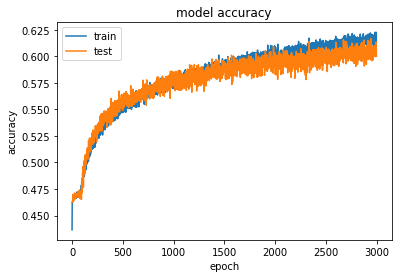

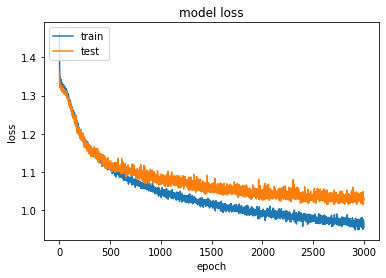

In [64]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1]*100)
print(model1.metrics_names)

Y_pred=model1.predict(X_test)


# print(len(Y_test[Y_test==1]))
print(len(Y_pred))
print(len(old[old==4]))
Y_pred = np.argmax(Y_pred, axis=1)
print(len(Y_pred[Y_pred==4]))

# print(len(Y_pred[Y_pred<0.5]))
# print(len(Y_pred[Y_pred<0.5]))


Test accuracy: 60.02324230271948
['loss', 'acc']
3442
446
367


In [67]:
# print(Y_pred)
# Y_pred = np.argmax(Y_pred, axis=1)
print(Y_pred)
new=Y_pred
Y_pred = Y_pred.reshape(len(Y_pred), 1)
Y_pred = onehot_encoder.transform(Y_pred)

[4 2 2 ... 2 2 3]


Y_pred=(Y_pred > 0.5).astype(np.int)

# print(Y_pred)
Y_pred=np.ravel(Y_pred)
# print(len(Y_pred[Y_pred==0]))

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(old, new)
print(cm)
print(classification_report(Y_test, Y_pred))

[[ 253   45  120    2   26]
 [  72  119  314    5   19]
 [  59   67 1406   24   36]
 [  19    3  295   57   55]
 [  33   11  143   28  231]]
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       446
           1       0.49      0.22      0.31       529
           2       0.62      0.88      0.73      1592
           3       0.49      0.13      0.21       429
           4       0.63      0.52      0.57       446

   micro avg       0.60      0.60      0.60      3442
   macro avg       0.56      0.47      0.48      3442
weighted avg       0.58      0.60      0.56      3442
 samples avg       0.60      0.60      0.60      3442

